### S09 T02: Aprenentatge Supervisat - Regressions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/Users/Diana/Downloads/archive/DelayedFlights.csv')

In [3]:
data=data.dropna()

In [4]:
data=data.drop_duplicates()

In [5]:
airlines=data.drop(['Unnamed: 0','CRSDepTime','CRSArrTime','FlightNum','TailNum', 'ActualElapsedTime', 'CRSElapsedTime','TaxiIn', 'TaxiOut','CancellationCode'], axis=1)
airlines.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,2008,1,3,4,1829.0,1959.0,WN,77.0,34.0,34.0,IND,BWI,515,0,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1937.0,2037.0,WN,230.0,57.0,67.0,IND,LAS,1591,0,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1644.0,1845.0,WN,107.0,80.0,94.0,IND,MCO,828,0,0,8.0,0.0,0.0,0.0,72.0
9,2008,1,3,4,1452.0,1640.0,WN,213.0,15.0,27.0,IND,PHX,1489,0,0,3.0,0.0,0.0,0.0,12.0
11,2008,1,3,4,1323.0,1526.0,WN,110.0,16.0,28.0,IND,TPA,838,0,0,0.0,0.0,0.0,0.0,16.0


In [6]:
airlines.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1247486.0,1247486.00,1247486.00,1247486.00,1247486.00,1247486.00,1247486.00,1247486.00,1247486.00,1247486.00,1247486.0,1247486.0,1247486.00,1247486.00,1247486.00,1247486.00,1247486.00
mean,2008.0,6.07,15.73,3.98,1558.83,1616.75,107.42,63.29,59.68,741.59,0.0,0.0,19.18,3.70,15.02,0.09,25.30
std,0.0,3.51,8.79,1.99,454.33,583.94,68.17,60.75,59.87,559.36,0.0,0.0,43.55,21.49,33.83,2.02,42.05
min,2008.0,1.00,1.00,1.00,1.00,1.00,0.00,15.00,6.00,11.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
25%,2008.0,3.00,8.00,2.00,1232.00,1326.00,58.00,26.00,24.00,334.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
50%,2008.0,6.00,16.00,4.00,1618.00,1737.00,90.00,43.00,41.00,595.00,0.0,0.0,2.00,0.00,2.00,0.00,8.00
75%,2008.0,9.00,23.00,6.00,1924.00,2048.00,136.00,79.00,75.00,972.00,0.0,0.0,21.00,0.00,15.00,0.00,33.00
max,2008.0,12.00,31.00,7.00,2400.00,2400.00,1091.00,2461.00,2467.00,4962.00,0.0,0.0,2436.00,1352.00,1357.00,392.00,1316.00


### Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

In [7]:
#Using Skicit-learn to split data into training and testing sets

from sklearn.model_selection import train_test_split

#defining independent and dependent variable:

X=np.array(airlines['DepDelay']).reshape((-1, 1))
y=np.array(airlines['ArrDelay'])

In [8]:
#Split the data into training and testing sets

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

#### Simple Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
X=np.array(airlines['DepDelay']).reshape((-1, 1))  #stating independent variable. Reshape because this array is required to be two-dimensional
y=np.array(airlines['ArrDelay'])  #stating dependent variable

In [11]:
#Create a model and fit it

model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [12]:
#obtaining the coefficient of determination (𝑅²)

r_sq=model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9031143387590899


R2 is the proportion of the variance in the response variable that can be explained by the predictor variables in a linear regression model. The bigger the R2 value, the better the fit between prediction and actual value.

R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. That is why Adjusted R Square is introduced.

In [13]:
#display adjusted R-squared
1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.9031142610942371

Adjusted R Square is roughly the same as R Square meaning the model is quite robust.

In [14]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 5.740063751050258
slope: [0.96437103]


Our model predicts the response 5.74 when 𝑥 is zero. The value 𝑏₁(slope)=0.96 means that the predicted response rises by 0.96 when 𝑥 is increased by one.

In [15]:
#obtaining the predicted response. We can predict the class for new data instances using our finalized classification 
#model in scikit-learn using the predict() function.

linear_pred = model.predict(X)
print('predicted response:', linear_pred, sep='\n')

predicted response:
[38.52867893 70.35292307 96.390941   ... 34.67119479 60.70921272
 82.88974652]


In [16]:
df_reg=pd.DataFrame({'Actual':y, 'Predicted':linear_pred})
df_reg.head()

,Actual,Predicted
0,34.0,38.528679
1,57.0,70.352923
2,80.0,96.390941
3,15.0,31.778082
4,16.0,32.742453


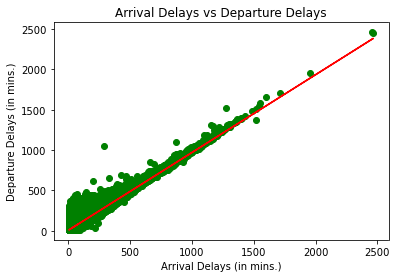

In [17]:
plt.scatter(X, y, color = "green")
plt.plot(X, model.predict(X), color = "red")
plt.title('Arrival Delays vs Departure Delays')
plt.xlabel('Arrival Delays (in mins.)')
plt.ylabel('Departure Delays (in mins.)')
plt.show()

#### Random Forest Regression Model

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification. It performs better results for classification problems.

In [18]:
#train the model:

#Import the model we are using
from sklearn.ensemble import RandomForestRegressor

#Instantiate model with 200 decision trees
rf=RandomForestRegressor(n_estimators=200, random_state=42)

In [19]:
#Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

Our model has now been trained to learn the relationships between X and y. The next step is figuring out how good the model is! To do this we make predictions on the X_test (the model is never allowed to see the test answers).

In [20]:
rf_pred=rf.predict(X_test)
print('predicted response:', rf_pred, sep='\n')

predicted response:
[ 36.60164224  29.27867308 146.95207949 ...  93.64076918  28.35085829
  26.5267355 ]


In [21]:
df_rf=pd.DataFrame({'Actual':y_test, 'Predicted':rf_pred})
df_rf.head()

,Actual,Predicted
0,44.0,36.601642
1,35.0,29.278673
2,137.0,146.952079
3,59.0,46.730877
4,28.0,31.072135


In [22]:
r_sq_rf=rf.score(X, y)
print('coefficient of determination:', r_sq_rf)

coefficient of determination: 0.9099232179909649


#### LASSO Regression

LASSO regression is a variation of linear regression specifically adapted for data that shows heavy multicollinearity (heavy correlation of features with each other). It automates parts of model selection, like variable selection or parameter elimination. Standing for Least Absolute Shrinkage and Selection Operator, LASSO uses shrinkage, a process in which data values are shrunk towards a central point (for example, the mean).

In [23]:
from sklearn.linear_model import LassoCV
model_lasso= LassoCV(random_state=42)
model_lasso.fit(X_train, y_train)

LassoCV(random_state=42)

In [24]:
lasso_pred=model_lasso.predict(X_test)
print('predicted response:', lasso_pred, sep='\n')

predicted response:
[ 40.46923851  29.87007762 145.49728738 ...  95.39216315  28.90651753
  23.12515705]


In [25]:
df_lasso=pd.DataFrame({'Actual':y_test, 'Predicted':lasso_pred})
df_lasso.head()

,Actual,Predicted
0,44.0,40.469239
1,35.0,29.870078
2,137.0,145.497287
3,59.0,51.068399
4,28.0,33.724318


In [26]:
r_sq_lasso=model_lasso.score(X, y)
print('coefficient of determination:', r_sq_lasso)

coefficient of determination: 0.9031136853636889


### Exercici 2

Compara’ls en base al MSE i al R2 .

R Square: measures how much variability in dependent variable can be explained by the model. It is the square of the Correlation Coefficient(R) and that is why it is called R Square. R Square is a good measure to determine how well the model fits the dependent variables.

In [27]:
from sklearn import metrics

R Square measures how much variability in dependent variable can be explained by the model

In [28]:
print('R Square for Linear Model:' , r_sq)
print('R Square for Random Forest Model:' , r_sq_rf)
print('R Square for Lasso Model:' , r_sq_lasso)

R Square for Linear Model: 0.9031143387590899
R Square for Random Forest Model: 0.9099232179909649
R Square for Lasso Model: 0.9031136853636889


All models have very similar values but with Random Forest Model we can interpret that almost 91% of dependent variability can be explained with the model.

While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness for the fit. It gives you an absolute number on how much your predicted results deviate from the actual number.

In [29]:
print('Mean Squared Error for Linear Model:', metrics.mean_squared_error(y, linear_pred))
print('Mean Squared Error for Random Forest Model:', metrics.mean_squared_error(y_test, rf_pred))
print('Mean Squared Error for Lasso Model:', metrics.mean_squared_error(y_test, lasso_pred))

Mean Squared Error for Linear Model: 357.60697789082246
Mean Squared Error for Random Forest Model: 332.87018140911294
Mean Squared Error for Lasso Model: 357.5868665555633


The least deviation of the three models is the Random Forest. Again, results are very similar among all three.

Root Mean Square Error(RMSE) is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. 

In [30]:
print('Root Mean Squared Error for Linear Model:', np.sqrt(metrics.mean_squared_error(y, linear_pred)))
print('Root Mean Squared Error for Random Forest Model:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('Root Mean Squared Error for Lasso Model:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

Root Mean Squared Error for Linear Model: 18.91049914441241
Root Mean Squared Error for Random Forest Model: 18.244730236676915
Root Mean Squared Error for Lasso Model: 18.90996738642252


As we have seen with MSE, the best model is still Random Forest.

### Exercici 2

Entrena’ls utilitzant els diferents paràmetres que admeten.

**Linear Regression**

In [31]:
#model by default

model=LinearRegression()
model.fit(X,y)
r_sq=model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9031143387590899


In [32]:
#I will change n-jobs parameter tp -1 (using all processors) and set normalize to True, meaning the regressors X 
#will be normalized before regression by subtracting the mean and dividing by the l2-norm

model=LinearRegression(n_jobs=-1, normalize=True)
model.fit(X,y)
r_sq=model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9031143387590899


In [33]:
#Training the model with fit intercept Whether to calculate the intercept for this model. 
#If set to False, no intercept will be used in calculations (i.e. data is expected to be centered)

model=LinearRegression(fit_intercept=False)
model.fit(X,y)
r_sq=model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8986367245409899


Setting fit_intercept to False will reduce accuracy.

**Random Forest Regression**

In [34]:
#model by default

rf=RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
r_sq_rf=rf.score(X, y)
print('coefficient of determination:', r_sq_rf)

coefficient of determination: 0.9099232179909649


In [35]:
#Changing n_estimators to 1000, setting random_state to 0, and bootstrap to True (bootstrap samples 
#are used when building trees)

rf=RandomForestRegressor(n_estimators=1000, random_state=0, bootstrap=True)
rf.fit(X_train, y_train)
r_sq_rf=rf.score(X, y)
print('coefficient of determination:', r_sq_rf)

coefficient of determination: 0.9099235534824746


In [36]:
#Changing n_estimators to 100, setting random_state to 42, bootstrap to False

rf=RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=False)
rf.fit(X_train, y_train)
r_sq_rf=rf.score(X, y)
print('coefficient of determination:', r_sq_rf)

coefficient of determination: 0.9099330278142707


In [37]:
rf=RandomForestRegressor(n_estimators=1000, random_state=42, bootstrap=True, warm_start=True)
rf.fit(X_train, y_train)
r_sq_rf=rf.score(X, y)
print('coefficient of determination:', r_sq_rf)

coefficient of determination: 0.9099244400545512


In this case, all the variations performed lead to a similar result.

**Lasso Regression Model**

In [38]:
#initial model

model_lasso= LassoCV(random_state=42)
model_lasso.fit(X_train, y_train)
r_sq_lasso=model_lasso.score(X, y)
print('coefficient of determination:', r_sq_lasso)

coefficient of determination: 0.9031136853636889


In [39]:
#setting fit_intercept to False, max_iter to 2000 (default is 1000)

model_lasso= LassoCV(random_state=42, fit_intercept=False, max_iter=2000)
model_lasso.fit(X_train, y_train)
r_sq_lasso=model_lasso.score(X, y)
print('coefficient of determination:', r_sq_lasso)

coefficient of determination: 0.8986348944662619


In [40]:
#setting max_iter to 500 and cv=10 (default is 5), and selection='random' (cyclic is default). By setting selection to
#random, a random coefficient is updated every iteration rather than looping over features sequentially by default. 

model_lasso= LassoCV(random_state=42, fit_intercept=False, max_iter=500, cv=10, selection='random')
model_lasso.fit(X_train, y_train)
r_sq_lasso=model_lasso.score(X, y)
print('coefficient of determination:', r_sq_lasso)

coefficient of determination: 0.8986348944662619


Clearly, setting intercept to False (no intercept used in calculations) makes the model less precise.

### Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

**Linear Regression**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
linear_model=LinearRegression().fit(X_train, y_train) 

In [43]:
y_linear_pred= model.predict(X_test)

In [44]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_linear_pred})
df.head()

,Actual,Predicted
0,44.0,36.443142
1,35.0,25.307737
2,137.0,146.784876
3,59.0,47.578546
4,28.0,29.356975


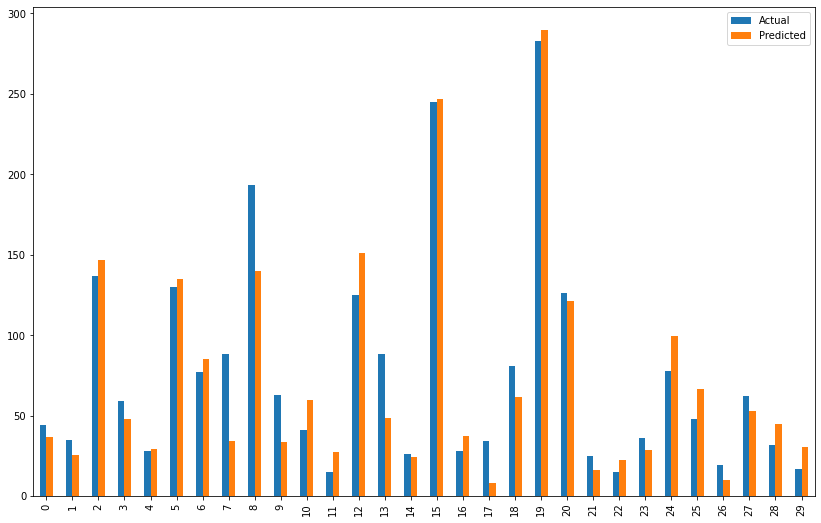

In [45]:
#plotting the first 30 observations

df1=df.head(30) 

df1.plot(kind='bar',figsize=(14,9))
plt.show()

As we can see some of the predicted values are very close to the real ones in most observations.

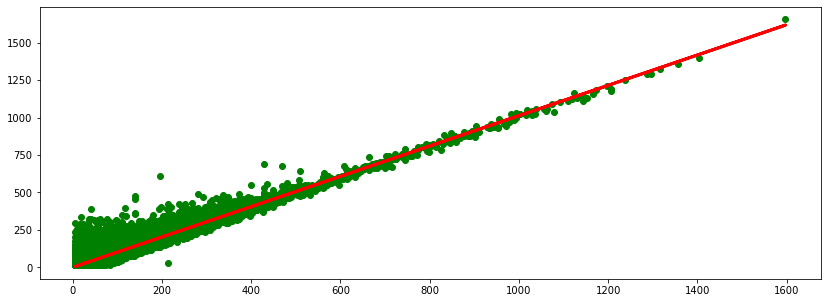

In [46]:
fig, ax = plt.subplots(figsize = (14, 5))
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_linear_pred, color='red', linewidth=3)
plt.show()

The red line shows that our prediction algorithms is pretty accurate.

**Random Forest Regression Model**

In [47]:
rf=RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [48]:
df_rf=pd.DataFrame({'Actual':y_test, 'Predicted':rf_pred})
df_rf.head()

,Actual,Predicted
0,44.0,36.601642
1,35.0,29.278673
2,137.0,146.952079
3,59.0,46.730877
4,28.0,31.072135


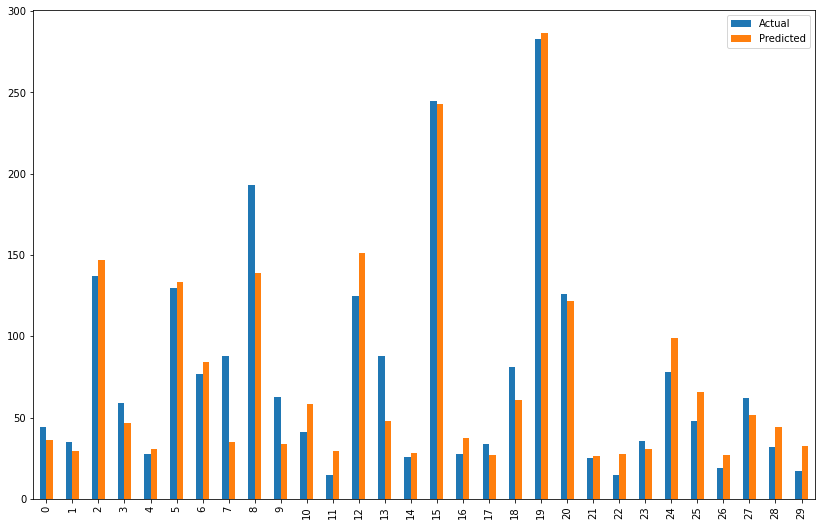

In [49]:
df2=df_rf.head(30) 

df2.plot(kind='bar',figsize=(14,9))
plt.show()

As in the Linear Regression Model we can observe that predicted values vs. real are generally similar.

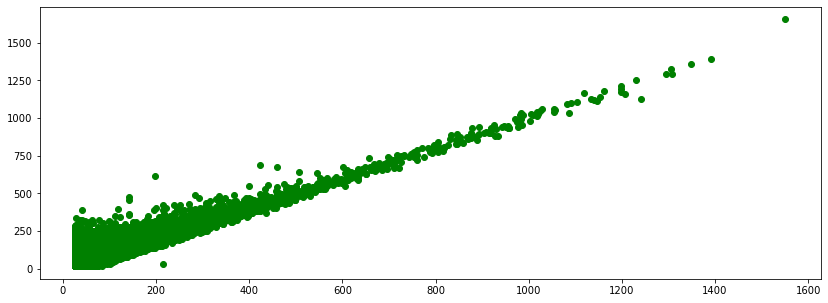

In [50]:
fig, ax = plt.subplots(figsize = (14, 5))
plt.scatter(df_rf['Predicted'], df_rf['Actual'],  color='green')
plt.show()

A straight line proves that our model is very accurate.

**Lasso Regression Model**

In [51]:
model_lasso= LassoCV(random_state=42)
model_lasso.fit(X_train, y_train)

LassoCV(random_state=42)

In [52]:
df_lasso=pd.DataFrame({'Actual':y_test, 'Predicted':lasso_pred})
df_lasso.head()

,Actual,Predicted
0,44.0,40.469239
1,35.0,29.870078
2,137.0,145.497287
3,59.0,51.068399
4,28.0,33.724318


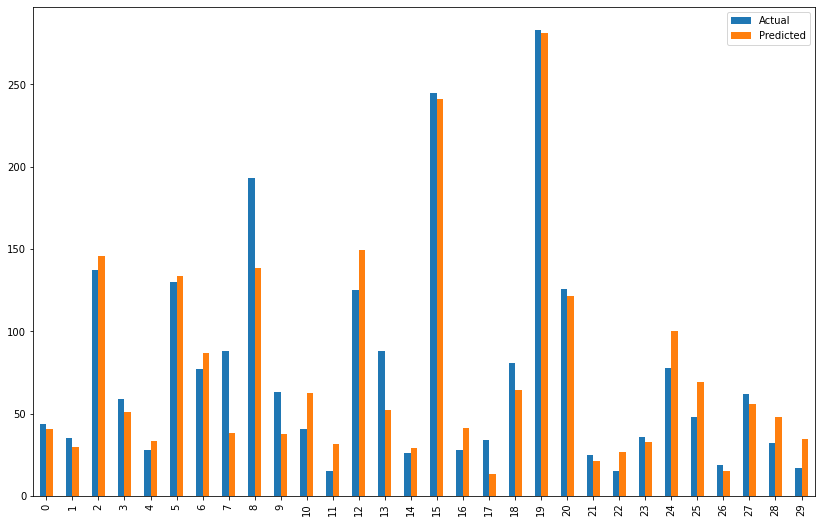

In [53]:
df3=df_lasso.head(30) 

df3.plot(kind='bar',figsize=(14,9))
plt.show()

As we can see some of the predicted values are very close to the real ones in most observations.

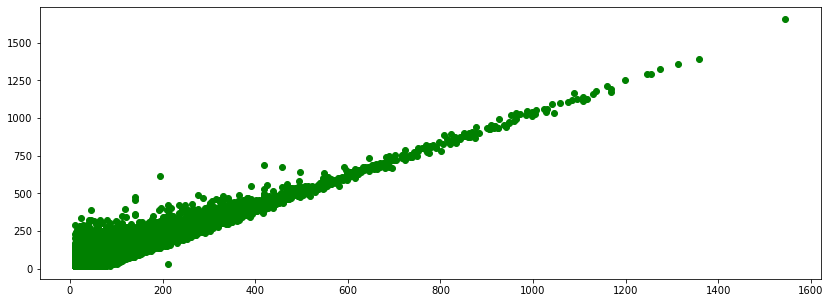

In [54]:
fig, ax = plt.subplots(figsize = (14, 5))
plt.scatter(df_lasso['Predicted'], df_lasso['Actual'],  color='green')
plt.show()

### Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

In [55]:
#I will normalize the two variables taking out the outliers:

airlines.describe()[['DepDelay','ArrDelay']].round(2)

,DepDelay,ArrDelay
count,1247486.00,1247486.00
mean,59.68,63.29
std,59.87,60.75
min,6.00,15.00
25%,24.00,26.00
50%,41.00,43.00
75%,75.00,79.00
max,2467.00,2461.00


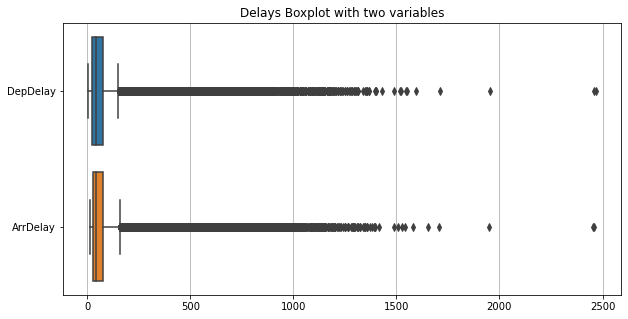

In [56]:
#Visualize original dataframe first to project outliers

plt.figure(figsize=(10,5))
sns.boxplot(data=airlines[['DepDelay','ArrDelay']], orient='h');
plt.title('Delays Boxplot with two variables');
plt.grid(axis='x')

As we can see there are a considerable number of outliers.

In [57]:
robust_df=pd.DataFrame({'DepDelay':airlines.DepDelay, 'ArrDelay':airlines.ArrDelay})
robust_df.head()

,DepDelay,ArrDelay
3,34.0,34.0
5,67.0,57.0
7,94.0,80.0
9,27.0,15.0
11,28.0,16.0


In [58]:
#using RobustScaler to standardize ignoring the outliers

from sklearn.preprocessing import RobustScaler

#initiate Robust Scaler
trans=RobustScaler()

airlines_robust=robust_df.copy()

numeric=airlines_robust.columns[-3:]

#perform a robust scaler transform of the dataset
airlines_robust[numeric]=trans.fit_transform(airlines_robust)
airlines_robust[numeric].describe()

,DepDelay,ArrDelay
count,1.247486e+06,1.247486e+06
mean,3.662198e-01,3.828497e-01
std,1.173898e+00,1.146298e+00
min,-6.862745e-01,-5.283019e-01
25%,-3.333333e-01,-3.207547e-01
50%,0.000000e+00,0.000000e+00
75%,6.666667e-01,6.792453e-01
max,4.756863e+01,4.562264e+01


In [59]:
airlines_scaled=airlines_robust[numeric].copy()

In [60]:
X=np.array(airlines_scaled['DepDelay']).reshape((-1, 1))
y=np.array(airlines_scaled['ArrDelay'])

In [61]:
linear_model=LinearRegression().fit(X, y)

In [62]:
linear_pred=linear_model.predict(X)

In [63]:
linear_pred.shape, y.shape, X.shape

((1247486,), (1247486,), (1247486, 1))

In [64]:
df_reg=pd.DataFrame({'Actual':y, 'Predicted':linear_pred})
df_reg.head()

,Actual,Predicted
0,-0.169811,-0.084365
1,0.264151,0.516093
2,0.698113,1.007376
3,-0.528302,-0.211734
4,-0.509434,-0.193539


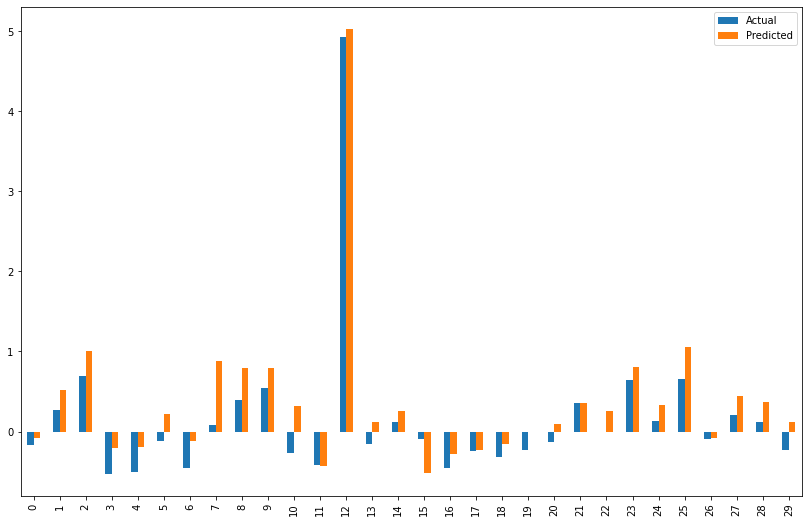

In [65]:
df4=df_reg.head(30) 

df4.plot(kind='bar',figsize=(14,9))
plt.show()

In [66]:
r_sq4=linear_model.score(X, y)
print('R Square for Linear Model:' , r_sq4)

R Square for Linear Model: 0.9031143387590901


In [67]:
print('Mean Squared Error for Linear Model:', metrics.mean_squared_error(y, linear_pred))

Mean Squared Error for Linear Model: 0.12730757489883315


Let's compare the results with the previous exercise:

- R Square for Linear Model: 0.9031143387590899
- Mean Squared Error for Linear Model: 357.60697789082246

As we can see there are no major changes in R Square but we can see an improvement in MSE. So thanls to Feature Engineering we have gained accuracy in our model.

### Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

In [68]:
airlines.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1247486.0,1247486.00,1247486.00,1247486.00,1247486.00,1247486.00,1247486.00,1247486.00,1247486.00,1247486.00,1247486.0,1247486.0,1247486.00,1247486.00,1247486.00,1247486.00,1247486.00
mean,2008.0,6.07,15.73,3.98,1558.83,1616.75,107.42,63.29,59.68,741.59,0.0,0.0,19.18,3.70,15.02,0.09,25.30
std,0.0,3.51,8.79,1.99,454.33,583.94,68.17,60.75,59.87,559.36,0.0,0.0,43.55,21.49,33.83,2.02,42.05
min,2008.0,1.00,1.00,1.00,1.00,1.00,0.00,15.00,6.00,11.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
25%,2008.0,3.00,8.00,2.00,1232.00,1326.00,58.00,26.00,24.00,334.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
50%,2008.0,6.00,16.00,4.00,1618.00,1737.00,90.00,43.00,41.00,595.00,0.0,0.0,2.00,0.00,2.00,0.00,8.00
75%,2008.0,9.00,23.00,6.00,1924.00,2048.00,136.00,79.00,75.00,972.00,0.0,0.0,21.00,0.00,15.00,0.00,33.00
max,2008.0,12.00,31.00,7.00,2400.00,2400.00,1091.00,2461.00,2467.00,4962.00,0.0,0.0,2436.00,1352.00,1357.00,392.00,1316.00


DepDelay is disaggregated into: CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, and LateAircraftDelay. So if we add all those values we will get the total delay to predict ArrDelay.

In [69]:
delays=airlines[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].sum(axis=1)
delays=pd.DataFrame({'TotalDelays':delays})
delays.head()

,TotalDelays
3,34.0
5,57.0
7,80.0
9,15.0
11,16.0


In [70]:
X=np.array(delays['TotalDelays']).reshape((-1, 1))
y=np.array(airlines['ArrDelay'])

In [71]:
print(X.shape)
print(y.shape)

(1247486, 1)
(1247486,)


In [72]:
#I will use Lasso Regression Model for the prediction, first Train-Set Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
model_lasso= LassoCV(random_state=42)
model_lasso.fit(X_train, y_train)

LassoCV(random_state=42)

In [74]:
df_lasso2=pd.DataFrame({'Actual':y_test, 'Predicted':lasso_pred})
df_lasso2.head()

,Actual,Predicted
0,44.0,40.469239
1,35.0,29.870078
2,137.0,145.497287
3,59.0,51.068399
4,28.0,33.724318


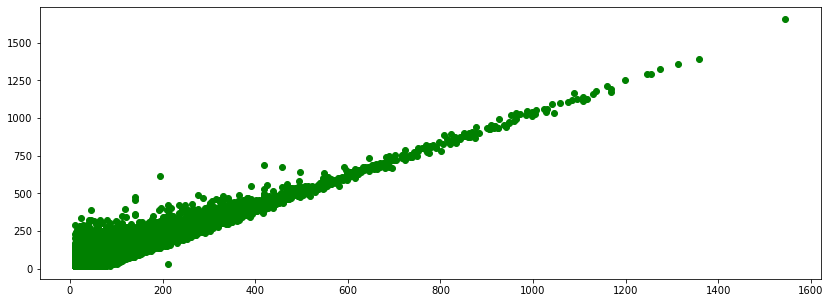

In [75]:
fig, ax = plt.subplots(figsize = (14, 5))
plt.scatter(df_lasso2['Predicted'], df_lasso2['Actual'],  color='green')
plt.show()

In [76]:
r_sq_lasso2=model_lasso.score(X, y)
print('coefficient of determination:', r_sq_lasso2)

coefficient of determination: 0.9999989999999743


In [77]:
print('Mean Squared Error for Lasso Model:', metrics.mean_squared_error(y_test, lasso_pred))

Mean Squared Error for Lasso Model: 357.5868665555633


Improves R Square (initial R Square: 0.9031136853636889)

MSE remains the same: 357.5868665555633